# 7CS042/UM2: MSc Project Artificial

## Umolu John Chukwuemeka (2065655)

In [1]:
# Import libraries to use in python
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Load all image from the directory 
data_dir = 'data'

In [3]:
# Assign the parameters to use to build and train the model
batch_size = 32
epochs=50
img_height = 224
img_width = 224

In [4]:
# Augument images 
train_data_generator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split = 0.2)

test_data_generator = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2)

In [5]:
# 
train_data = train_data_generator.flow_from_directory(
    data_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'training')

val_data = test_data_generator.flow_from_directory(
    data_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode='categorical',
    subset = 'validation')

Found 80800 images belonging to 101 classes.
Found 20197 images belonging to 101 classes.


In [6]:
# build the resnet model
ResNet50V2 = tf.keras.applications.resnet_v2.ResNet50V2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg',
    classes=101
)

for layer in ResNet50V2.layers:
    layer.trainable = False

In [7]:
# build a keras sequential model using the built resnet model
model_ResNet = tf.keras.Sequential([
    ResNet50V2,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(101, activation = 'softmax')
    ])

model_ResNet.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(learning_rate=.0001), 
    metrics=['accuracy'])

In [8]:
# train the model
history = model_ResNet.fit(
  train_data,
  validation_data=val_data,
  epochs=epochs
)

Epoch 1/50
2525/2525 [==============================] - 2189s 859ms/step - loss: 3.1959 - accuracy: 0.2697 - val_loss: 2.4013 - val_accuracy: 0.4216
Epoch 2/50
2525/2525 [==============================] - 1956s 774ms/step - loss: 2.3952 - accuracy: 0.4205 - val_loss: 2.1284 - val_accuracy: 0.4774
Epoch 3/50
2525/2525 [==============================] - 1902s 752ms/step - loss: 2.2083 - accuracy: 0.4591 - val_loss: 2.0147 - val_accuracy: 0.5043
Epoch 4/50
2525/2525 [==============================] - 1870s 741ms/step - loss: 2.1110 - accuracy: 0.4785 - val_loss: 1.9519 - val_accuracy: 0.5165
Epoch 5/50
2525/2525 [==============================] - 1824s 723ms/step - loss: 2.0410 - accuracy: 0.4952 - val_loss: 1.9044 - val_accuracy: 0.5292
Epoch 6/50
2525/2525 [==============================] - 1897s 751ms/step - loss: 1.9849 - accuracy: 0.5054 - val_loss: 1.8711 - val_accuracy: 0.5367
Epoch 7/50
2525/2525 [==============================] - 1918s 760ms/step - loss: 1.9431 - accuracy: 0.5148

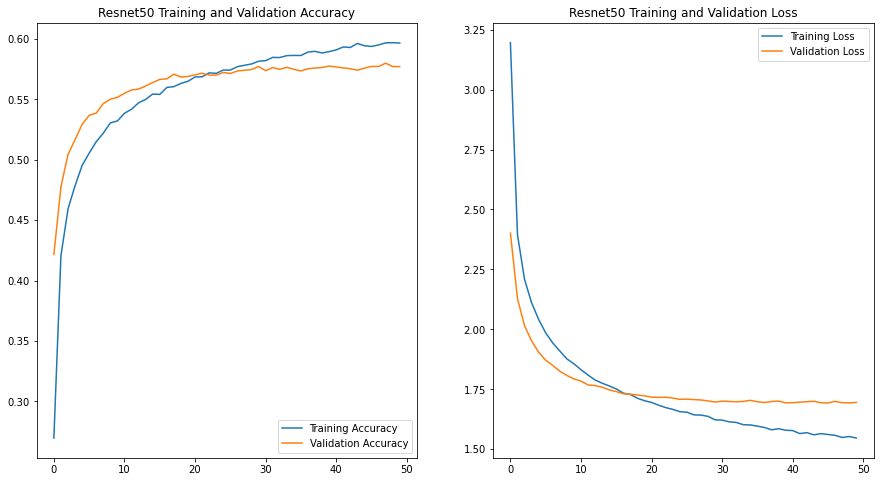

In [11]:
# plot a graph of the accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Resnet50 Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Resnet50 Training and Validation Loss')
plt.show()

In [10]:
# save the trained model to a file
model_ResNet.save('resnet50.h5')

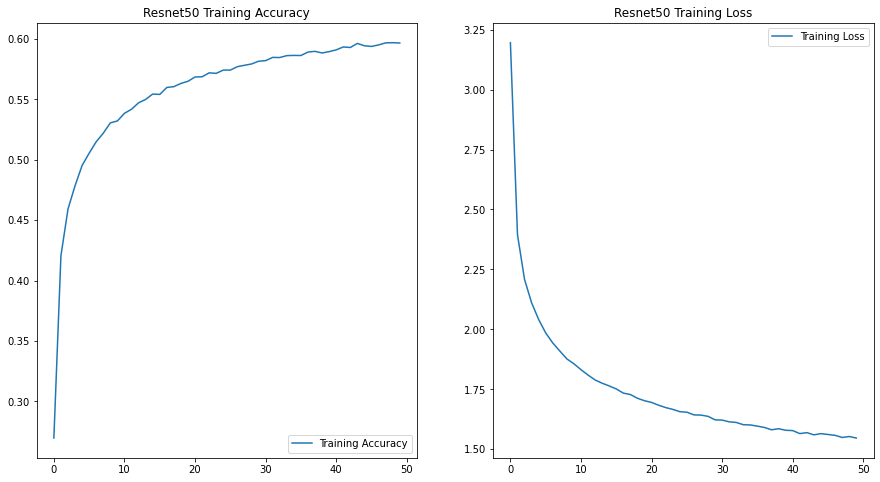

In [15]:
# plot the train accuracy and loss graphs
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Resnet50 Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Resnet50 Training Loss')
plt.show()

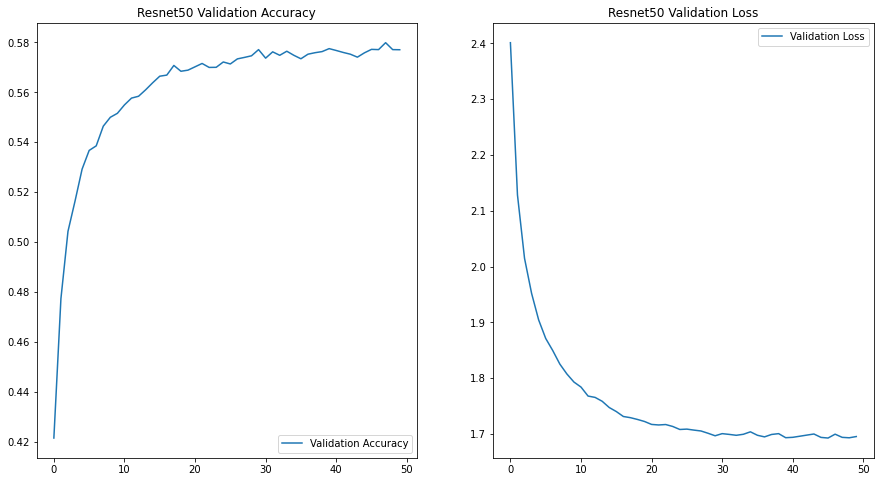

In [16]:
# plot the validation accuracy and loss graph
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Resnet50 Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Resnet50 Validation Loss')
plt.show()

In [3]:
# get a list of the label names
label_ids = [item for item in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, item))]

In [4]:
# save labels to text file
with open('labels.txt', 'w') as f:
    # loop trhough the found labels
    for names in label_ids:
        # save in text file in new line
        f.write(f"{names}\n")

## References

https://www.kaggle.com/code/hrialan/resnet50-training